In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import opendatasets as od
from tensorflow import keras


In [ ]:
od.download('https://www.kaggle.com/datasets/ckay16/accident-detection-from-cctv-footage')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rexasilent
Your Kaggle Key: ··········


100%|██████████| 249M/249M [00:03<00:00, 70.3MB/s]


In [ ]:
od.download('https://www.kaggle.com/datasets/fahaddalwai/cctvfootagevideo')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rexasilent
Your Kaggle Key: ··········


100%|██████████| 9.68M/9.68M [00:00<00:00, 64.4MB/s]

In [ ]:
batch_size=32
img_height,img_width=250,250

In [ ]:
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
)
train_data = image_data_generator.flow_from_directory(
    '/content/accident-detection-from-cctv-footage/data/train',
    seed=101,
    target_size= (img_height, img_width),
    batch_size= batch_size

)

test_data = image_data_generator.flow_from_directory(
    '/content/accident-detection-from-cctv-footage/data/test',
    seed=101,
    target_size= (img_height, img_width),
    batch_size=batch_size)

val_data =  image_data_generator.flow_from_directory(
    '/content/accident-detection-from-cctv-footage/data/val',
    seed=101,
    target_size= (img_height, img_width),
    batch_size=batch_size)

Found 791 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [ ]:
class_names=train_data.class_indices
class_names

{'Accident': 0, 'Non Accident': 1}

In [ ]:
img_size=(img_height,img_width,3)
base_model=keras.applications.MobileNetV2(input_shape=img_size,
                                          include_top=False)
base_model.trainable=False

In [ ]:
model=keras.models.Sequential([
    base_model,
    keras.layers.Conv2D(32,3,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64,3,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128,3,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(class_names),activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d_39 (Conv2D)          (None, 6, 6, 32)          368672    
                                                                 
 dropout_63 (Dropout)        (None, 6, 6, 32)          0         
                                                                 
 conv2d_40 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 dropout_64 (Dropout)        (None, 4, 4, 64)          0         
                                                                 
 conv2d_41 (Conv2D)          (None, 2, 2, 128)         73856     
                                                     

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_data,epochs=50,validation_data=val_data,
                  callbacks=[
                      keras.callbacks.EarlyStopping('val_loss',mode='min',patience=5)
                  ])

Epoch 1/50
25/25 [==============================] - 68s 3s/step - loss: 0.7210 - accuracy: 0.4893 - val_loss: 0.6752 - val_accuracy: 0.6020
Epoch 2/50
25/25 [==============================] - 62s 2s/step - loss: 0.6772 - accuracy: 0.6182 - val_loss: 0.6596 - val_accuracy: 0.7449
Epoch 3/50
25/25 [==============================] - 64s 3s/step - loss: 0.6653 - accuracy: 0.6068 - val_loss: 0.6406 - val_accuracy: 0.7551
Epoch 4/50
25/25 [==============================] - 63s 3s/step - loss: 0.6326 - accuracy: 0.6764 - val_loss: 0.5797 - val_accuracy: 0.7755
Epoch 5/50
25/25 [==============================] - 63s 3s/step - loss: 0.6026 - accuracy: 0.6966 - val_loss: 0.5099 - val_accuracy: 0.8265
Epoch 6/50
25/25 [==============================] - 63s 2s/step - loss: 0.5563 - accuracy: 0.7472 - val_loss: 0.4353 - val_accuracy: 0.8673
Epoch 7/50
25/25 [==============================] - 62s 2s/step - loss: 0.4739 - accuracy: 0.7914 - val_loss: 0.3749 - val_accuracy: 0.8367
Epoch 8/50
25/25 [==

In [ ]:
model.evaluate(train_data)

25/25 [==============================] - 50s 2s/step - loss: 0.0409 - accuracy: 0.9848


[0.04093931242823601, 0.984829306602478]

In [ ]:
model.evaluate(val_data)

4/4 [==============================] - 7s 2s/step - loss: 0.1638 - accuracy: 0.9184


[0.16378533840179443, 0.918367326259613]

In [ ]:
model.evaluate(test_data)

4/4 [==============================] - 6s 1s/step - loss: 0.0774 - accuracy: 0.9700


[0.07735783606767654, 0.9700000286102295]

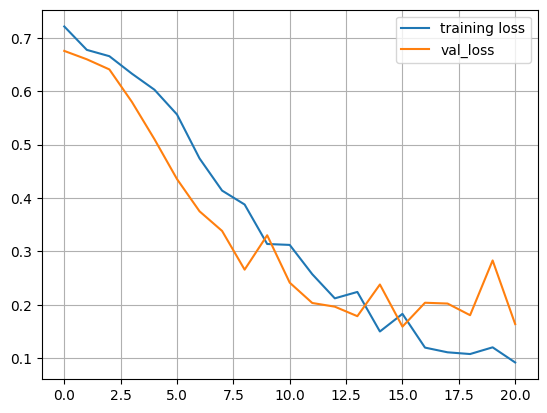

In [ ]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.grid(True)
plt.legend()

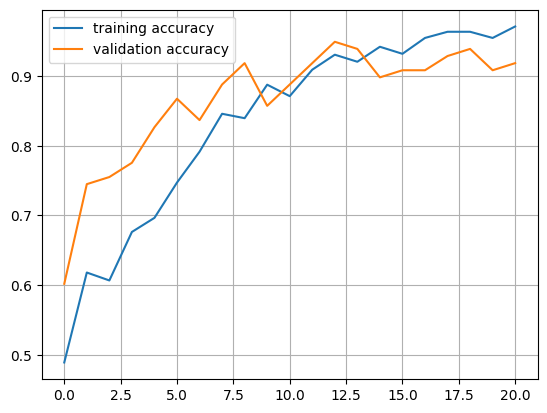

In [ ]:
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

In [ ]:
images, labels = test_data.next()

In [ ]:
y_pred = model.predict(images)

1/1 [==============================] - 4s 4s/step


In [ ]:
labels = np.argmax(labels, axis = 1)

In [ ]:
class_names = list(class_names)

In [ ]:
y_pred = np.argmax(y_pred, axis = 1)

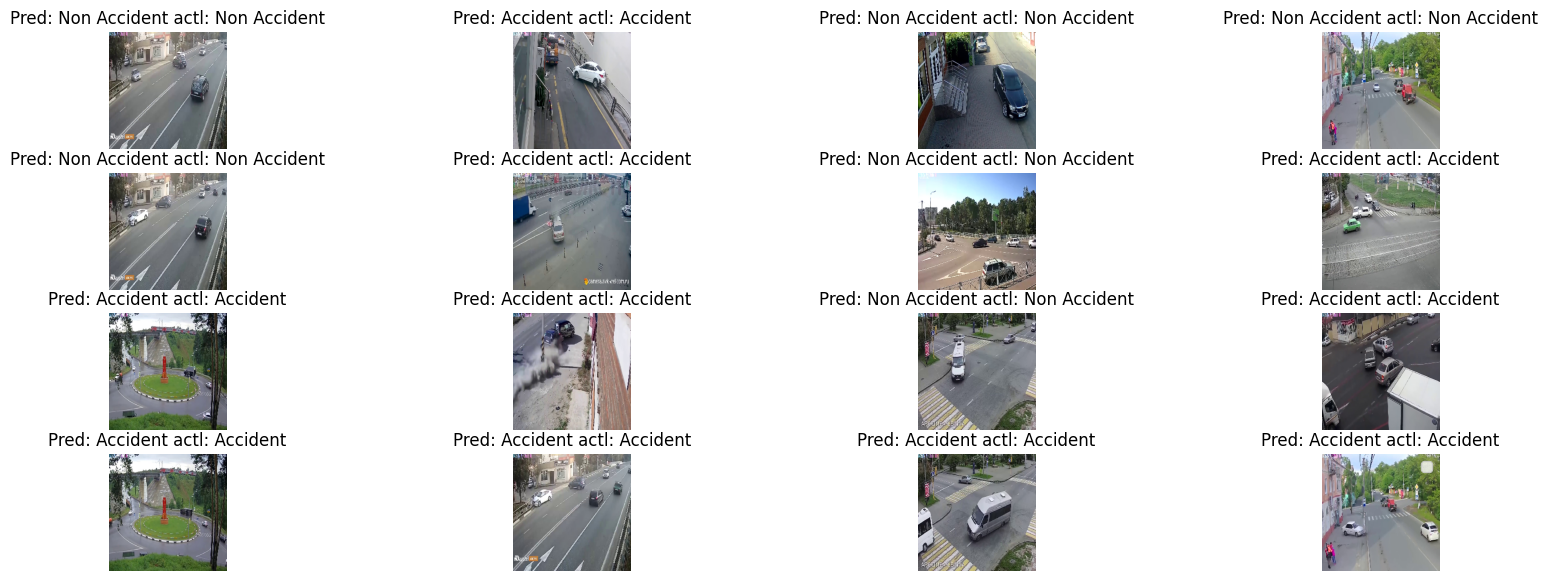

In [ ]:
plt.figure(figsize = (20, 7))
for i in range(16):
  plt.subplot(4, 4, (i + 1))
  resized_img=cv2.resize(images[i],(250,250))
  plt.imshow(resized_img)
  plt.title('Pred: {} actl: {}'.format(class_names[y_pred[i]], class_names[labels[i]]))
  plt.grid(False)
  plt.axis('off')
plt.legend()

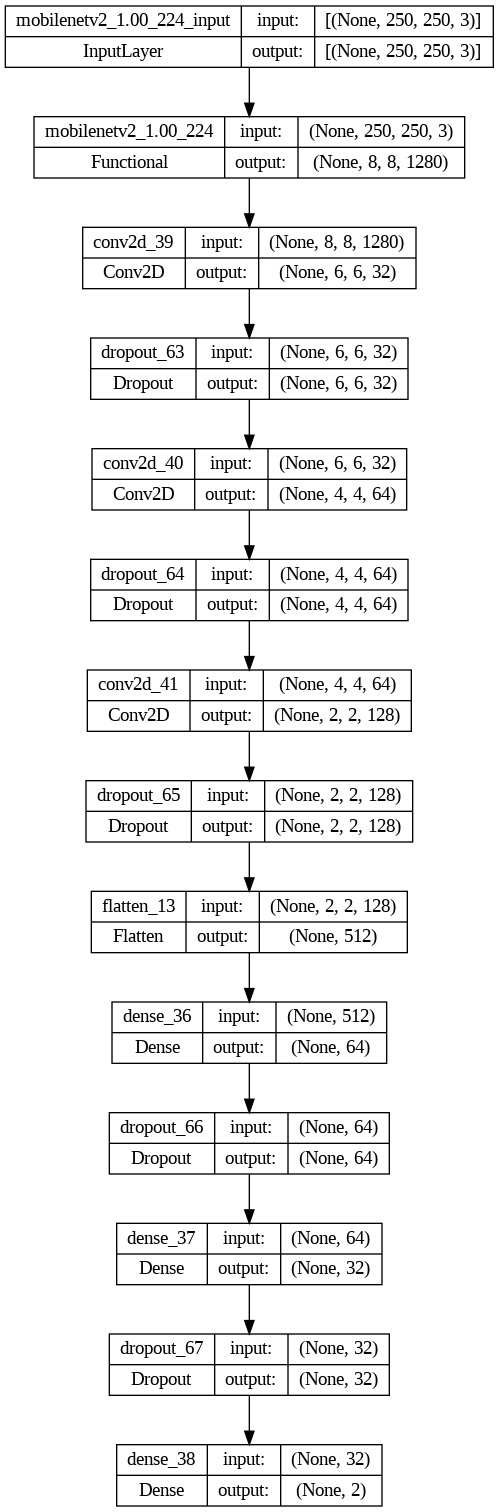

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
def predict_frame(img):
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction=(model.predict(img_batch) > 0.5).astype("int32")
    if(prediction[0][0]==0):
        return("Accident Detected")
    else:
        return("No Accident")

In [ ]:
import cv2
image=[]
label=[]

c=1
cap= cv2.VideoCapture('/content/cctvfootagevideo/videoplayback (online-video-cutter.com).mp4')
while True:
    grabbed, frame = cap.read()
    if c%30==0:
        print(c)
        resized_frame=tf.keras.preprocessing.image.smart_resize(frame, (img_height, img_width), interpolation='bilinear')
        image.append(frame)
        label.append(predict_frame(resized_frame))
        if(len(image)==75):
            break
    c+=1

cap.release()

30
1/1 [==============================] - 1s 982ms/step
60
1/1 [==============================] - 0s 65ms/step
90
1/1 [==============================] - 0s 66ms/step
120
1/1 [==============================] - 0s 69ms/step
150
1/1 [==============================] - 0s 84ms/step
180
1/1 [==============================] - 0s 120ms/step
210
1/1 [==============================] - 0s 156ms/step
240
1/1 [==============================] - 0s 110ms/step
270
1/1 [==============================] - 0s 117ms/step
300
1/1 [==============================] - 0s 72ms/step
330
1/1 [==============================] - 0s 64ms/step
360
1/1 [==============================] - 0s 69ms/step
390
1/1 [==============================] - 0s 65ms/step
420
1/1 [==============================] - 0s 73ms/step
450
1/1 [==============================] - 0s 63ms/step
480
1/1 [==============================] - 0s 86ms/step
510
1/1 [==============================] - 0s 68ms/step
540
1/1 [==============================] - 0s 

Accident Detected
AxesImage(size=(360, 640))


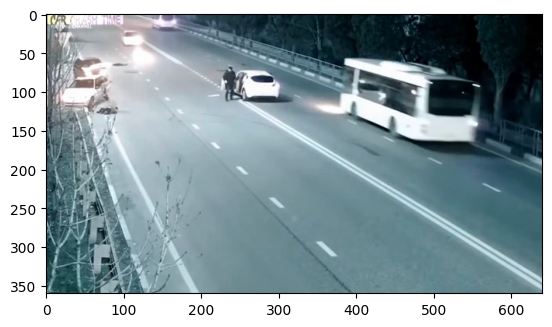

In [ ]:
print(label[50])
print(plt.imshow(image[50]))